# Matplotlib Tutorial👨🏼‍🏫

The goal of this repository is to provide an introduction in Matplotlib library. Matplotlib is a low-level plotting library that provides a wide range of data visualizations. The [data](https://data.gov.ro/dataset/date-climatologice-de-la-cele-23-de-statii-esentiale-pentru-anul-2016) used in this study were obtain from the database of the Romanian Government. We propose to analyze the climatological data collected from the 23 stations located on the national territory in the years 2000 and 2016.

**1.Reading data**

✏️We read the data from the two files and find out essential information about their type using the info() method.

In [217]:
import pandas as pd
climate_data_2016 = pd.read_csv('climatological_data_2016.csv')
climate_data_2000 = pd.read_csv('climatological_data_2000.csv')

In [218]:
climate_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODST    8418 non-null   int64  
 1   ALT      8418 non-null   float64
 2   LAT      8418 non-null   float64
 3   LON      8418 non-null   float64
 4   DATCLIM  8418 non-null   object 
 5   TMED     8418 non-null   float64
 6   TMAX     8418 non-null   float64
 7   TMIN     8418 non-null   float64
 8   R24      3155 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 592.0+ KB


In [219]:
climate_data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      8052 non-null   int64  
 1   CODST    8052 non-null   int64  
 2   ALT      8052 non-null   float64
 3   LAT      8052 non-null   float64
 4   LON      8052 non-null   float64
 5   DATCLIM  8052 non-null   object 
 6   TMED     8052 non-null   float64
 7   TMAX     8052 non-null   float64
 8   TMIN     8052 non-null   float64
 9   R24      2528 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 629.2+ KB


**2. Cleaning Data**

✏️We note that the climatological measures (temperatures and precipitation) are in float64 format. We expect them to be real numbers, so it is an appropriate data type. Keeping in mind that we do not have such high precision, we will change the data type to float32. For DATCLIM, the DType column states object. This is not an actual type, but a placeholder for any kind of native Python object, such as list, dict, str, etc. The correct type for calendar dates, as well as times, is datetime64. So we apply a conversion to the DATCLIM column. Another important aspect is that the CODST column is treated numerically. Since there are no numerical values in this column, but only identifiers, they must be treated as such. We can indicate this using the category data type. We will perform these data conversions in both tables.

In [220]:

climate_data_2000 = climate_data_2000.astype({'ALT': 'float32', 'TMED': 'float32', 'TMIN': 'float32', 'TMAX': 'float32', 'R24': 'float32', 'DATCLIM': 'datetime64', 'CODST': 'category'})
climate_data_2016 = climate_data_2016.astype({'ALT': 'float32', 'TMED': 'float32', 'TMIN': 'float32', 'TMAX': 'float32', 'R24': 'float32', 'DATCLIM': 'datetime64', 'CODST': 'category'})


In [221]:
climate_data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   _id      8052 non-null   int64         
 1   CODST    8052 non-null   category      
 2   ALT      8052 non-null   float32       
 3   LAT      8052 non-null   float64       
 4   LON      8052 non-null   float64       
 5   DATCLIM  8052 non-null   datetime64[ns]
 6   TMED     8052 non-null   float32       
 7   TMAX     8052 non-null   float32       
 8   TMIN     8052 non-null   float32       
 9   R24      2528 non-null   float32       
dtypes: category(1), datetime64[ns](1), float32(5), float64(2), int64(1)
memory usage: 417.6 KB


In [222]:
climate_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8418 entries, 0 to 8417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   CODST    8418 non-null   category      
 1   ALT      8418 non-null   float32       
 2   LAT      8418 non-null   float64       
 3   LON      8418 non-null   float64       
 4   DATCLIM  8418 non-null   datetime64[ns]
 5   TMED     8418 non-null   float32       
 6   TMAX     8418 non-null   float32       
 7   TMIN     8418 non-null   float32       
 8   R24      3155 non-null   float32       
dtypes: category(1), datetime64[ns](1), float32(5), float64(2)
memory usage: 370.8 KB


✏️We will delete the _id column from the table.

In [223]:
climate_data_2000 = climate_data_2000.drop(columns=['_id'])

In [224]:
climate_data_2000

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
0,15020,161.0,47.735556,26.645556,2000-01-01,-2.9,-0.8,-5.4,0.5
1,15020,161.0,47.735556,26.645556,2000-01-02,-1.2,0.4,-2.1,NaN
2,15020,161.0,47.735556,26.645556,2000-01-03,-2.9,0.3,-7.5,0.5
3,15020,161.0,47.735556,26.645556,2000-01-04,0.8,4.4,-0.5,NaN
4,15020,161.0,47.735556,26.645556,2000-01-05,0.8,2.8,-1.0,1.2
...,...,...,...,...,...,...,...,...,...
8047,15480,12.8,44.213889,28.645556,2000-12-27,12.4,18.4,9.2,NaN
8048,15480,12.8,44.213889,28.645556,2000-12-28,13.7,15.2,11.8,NaN
8049,15480,12.8,44.213889,28.645556,2000-12-29,14.4,19.0,11.4,NaN
8050,15480,12.8,44.213889,28.645556,2000-12-30,11.7,14.3,10.0,NaN


In [225]:
climate_data_2016

,CODST,ALT,LAT,LON,DATCLIM,TMED,TMAX,TMIN,R24
0,15015,503.0,47.776944,23.940556,2016-01-01,-10.0,-5.7,-13.6,NaN
1,15015,503.0,47.776944,23.940556,2016-01-02,-11.0,-5.9,-14.4,NaN
2,15015,503.0,47.776944,23.940556,2016-01-03,-12.2,-5.5,-16.4,NaN
3,15015,503.0,47.776944,23.940556,2016-01-04,-11.0,-5.3,-16.6,0.0
4,15015,503.0,47.776944,23.940556,2016-01-05,-5.7,-4.6,-8.1,1.5
...,...,...,...,...,...,...,...,...,...
8413,15480,12.8,44.213889,28.645556,2016-12-27,2.1,5.6,-0.6,0.3
8414,15480,12.8,44.213889,28.645556,2016-12-28,0.7,2.1,-1.5,0.4
8415,15480,12.8,44.213889,28.645556,2016-12-29,1.6,2.7,0.5,0.0
8416,15480,12.8,44.213889,28.645556,2016-12-30,0.4,1.5,-0.5,0.6


✏️We can see that the two tables have a different number of rows. We will have a clearer idea about this by separating the weather station data.

In [226]:
weather_stations_2016 = climate_data_2016[['CODST', 'ALT', 'LAT', 'LON']]
weather_stations_2016 = weather_stations_2016.drop_duplicates().set_index('CODST')
climate_data_2016=climate_data_2016.drop(columns=['ALT', 'LAT', 'LON'])

In [227]:
weather_stations_2016

,ALT,LAT,LON
CODST,,,
15015,503.000000,47.776944,23.940556
15020,161.000000,47.735556,26.645556
15090,74.290001,47.163333,27.627222
15108,1897.000000,46.977500,25.950000
15120,410.000000,46.777778,23.571389
15150,174.000000,46.557778,26.896667
15170,661.000000,46.371389,25.772500
15200,116.589996,46.133611,21.353611
15230,240.000000,45.865000,22.898889


In [228]:
climate_data_2016

,CODST,DATCLIM,TMED,TMAX,TMIN,R24
0,15015,2016-01-01,-10.0,-5.7,-13.6,NaN
1,15015,2016-01-02,-11.0,-5.9,-14.4,NaN
2,15015,2016-01-03,-12.2,-5.5,-16.4,NaN
3,15015,2016-01-04,-11.0,-5.3,-16.6,0.0
4,15015,2016-01-05,-5.7,-4.6,-8.1,1.5
...,...,...,...,...,...,...
8413,15480,2016-12-27,2.1,5.6,-0.6,0.3
8414,15480,2016-12-28,0.7,2.1,-1.5,0.4
8415,15480,2016-12-29,1.6,2.7,0.5,0.0
8416,15480,2016-12-30,0.4,1.5,-0.5,0.6


In [229]:
weather_stations_2000 = climate_data_2000[['CODST', 'ALT', 'LAT', 'LON']]
weather_stations_2000 = weather_stations_2000.drop_duplicates().set_index('CODST')
climate_data_2000=climate_data_2000.drop(columns=['ALT', 'LAT', 'LON'])

In [230]:
weather_stations_2000

,ALT,LAT,LON
CODST,,,
15020,161.000000,47.735556,26.645556
15090,74.290001,47.163333,27.627222
15108,1897.000000,46.977500,25.950000
15120,410.000000,46.777778,23.571389
15150,174.000000,46.557778,26.896667
15170,661.000000,46.371389,25.772500
15200,116.589996,46.133611,21.353611
15230,240.000000,45.865000,22.898889
15260,443.000000,45.789444,24.091389


In [231]:
climate_data_2000

,CODST,DATCLIM,TMED,TMAX,TMIN,R24
0,15020,2000-01-01,-2.9,-0.8,-5.4,0.5
1,15020,2000-01-02,-1.2,0.4,-2.1,NaN
2,15020,2000-01-03,-2.9,0.3,-7.5,0.5
3,15020,2000-01-04,0.8,4.4,-0.5,NaN
4,15020,2000-01-05,0.8,2.8,-1.0,1.2
...,...,...,...,...,...,...
8047,15480,2000-12-27,12.4,18.4,9.2,NaN
8048,15480,2000-12-28,13.7,15.2,11.8,NaN
8049,15480,2000-12-29,14.4,19.0,11.4,NaN
8050,15480,2000-12-30,11.7,14.3,10.0,NaN


✏️Analyzing the two tables ('weather_stations_2016' and 'weather_stations_2000') it can be seen that 'CODST=15015' is missing from the 'weather_stations_2000' table. This code belongs to the "Ocna Sugatag" weather station. In order to have the same number of weather stations in both tables, we will delete all the data related to this station from the 'weather_stations_2016' table.

In [232]:
weather_stations_2016=weather_stations_2016.drop(weather_stations_2016.index[0])

In [233]:
weather_stations_2016

,ALT,LAT,LON
CODST,,,
15020,161.000000,47.735556,26.645556
15090,74.290001,47.163333,27.627222
15108,1897.000000,46.977500,25.950000
15120,410.000000,46.777778,23.571389
15150,174.000000,46.557778,26.896667
15170,661.000000,46.371389,25.772500
15200,116.589996,46.133611,21.353611
15230,240.000000,45.865000,22.898889
15260,443.000000,45.789444,24.091389


✏️We will add to the two tables ('weather_stations_2016' and 'weather_stations_2000') a column with the names of the weather stations.

In [234]:
station_names_str = '15020-Botosani, 15090-Iasi, 15108-Ceahlau Toaca, 15120-Cluj-Napoca, 15150-Bacau, 15170-Miercurea Ciuc, 15200-Arad, 15230-Deva, 15260-Sibiu, 15280-Varfu Omu, 15292-Caransebes, 15310-Galati, 15335-Tulcea, 15346-Ramnicu Valcea, 15350-Buzau, 15360-Sulina, 15410-Drobeta Turnu Severin, 15420-Bucuresti-Baneasa, 15450-Craiova, 15460-Calarasi, 15470-Rosiorii de Vede, 15480-Constanta'
station_names_list = [x.split('-', 1) for x in station_names_str.split(', ')]
station_names= pd.DataFrame(station_names_list, columns=['CODST', 'Nume']).astype({'CODST': 'int64'}).set_index('CODST')
weather_stations_2016= weather_stations_2016.merge(station_names, on='CODST',how='left')

In [235]:
weather_stations_2016

,ALT,LAT,LON,Nume
CODST,,,,
15020,161.000000,47.735556,26.645556,Botosani
15090,74.290001,47.163333,27.627222,Iasi
15108,1897.000000,46.977500,25.950000,Ceahlau Toaca
15120,410.000000,46.777778,23.571389,Cluj-Napoca
15150,174.000000,46.557778,26.896667,Bacau
15170,661.000000,46.371389,25.772500,Miercurea Ciuc
15200,116.589996,46.133611,21.353611,Arad
15230,240.000000,45.865000,22.898889,Deva
15260,443.000000,45.789444,24.091389,Sibiu


In [236]:
weather_stations_2000= weather_stations_2000.merge(station_names, on='CODST',how='left')

In [237]:
weather_stations_2000

,ALT,LAT,LON,Nume
CODST,,,,
15020,161.000000,47.735556,26.645556,Botosani
15090,74.290001,47.163333,27.627222,Iasi
15108,1897.000000,46.977500,25.950000,Ceahlau Toaca
15120,410.000000,46.777778,23.571389,Cluj-Napoca
15150,174.000000,46.557778,26.896667,Bacau
15170,661.000000,46.371389,25.772500,Miercurea Ciuc
15200,116.589996,46.133611,21.353611,Arad
15230,240.000000,45.865000,22.898889,Deva
15260,443.000000,45.789444,24.091389,Sibiu


✏️We will add to the two tables a column with the minimum temperatures recorded at each weather station during the calendar year (2000 and 2016, respectively).


In [238]:
weather_stations_2000_tmin = weather_stations_2000.join(climate_data_2000.groupby('CODST').min().TMIN)
weather_stations_2000_tmin

,ALT,LAT,LON,Nume,TMIN
CODST,,,,,
15020,161.000000,47.735556,26.645556,Botosani,-17.400000
15090,74.290001,47.163333,27.627222,Iasi,-15.600000
15108,1897.000000,46.977500,25.950000,Ceahlau Toaca,-24.700001
15120,410.000000,46.777778,23.571389,Cluj-Napoca,-18.500000
15150,174.000000,46.557778,26.896667,Bacau,-19.000000
15170,661.000000,46.371389,25.772500,Miercurea Ciuc,-33.099998
15200,116.589996,46.133611,21.353611,Arad,-20.600000
15230,240.000000,45.865000,22.898889,Deva,-20.400000
15260,443.000000,45.789444,24.091389,Sibiu,-21.000000


In [239]:
weather_stations_2016_tmin = weather_stations_2016.join(climate_data_2016.groupby('CODST').min().TMIN)
weather_stations_2016_tmin

,ALT,LAT,LON,Nume,TMIN
CODST,,,,,
15020,161.000000,47.735556,26.645556,Botosani,-17.400000
15090,74.290001,47.163333,27.627222,Iasi,-17.100000
15108,1897.000000,46.977500,25.950000,Ceahlau Toaca,-23.799999
15120,410.000000,46.777778,23.571389,Cluj-Napoca,-14.700000
15150,174.000000,46.557778,26.896667,Bacau,-14.700000
15170,661.000000,46.371389,25.772500,Miercurea Ciuc,-22.200001
15200,116.589996,46.133611,21.353611,Arad,-13.200000
15230,240.000000,45.865000,22.898889,Deva,-16.000000
15260,443.000000,45.789444,24.091389,Sibiu,-22.600000


In [240]:
weather_stations_2000_tmin.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 22 entries, 15020 to 15480
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALT     22 non-null     float32
 1   LAT     22 non-null     float64
 2   LON     22 non-null     float64
 3   Nume    22 non-null     object 
 4   TMIN    22 non-null     float32
dtypes: float32(2), float64(2), object(1)
memory usage: 1.7+ KB


In [241]:
weather_stations_2016_tmin.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 22 entries, 15020 to 15480
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALT     22 non-null     float32
 1   LAT     22 non-null     float64
 2   LON     22 non-null     float64
 3   Nume    22 non-null     object 
 4   TMIN    22 non-null     float32
dtypes: float32(2), float64(2), object(1)
memory usage: 1.8+ KB


✏️The two tables contain data about the minimum temperatures recorded at the weather stations in 2000 and 2016.

**What was the minimum temperature in 2000 and in 2016, recorded in each meteorological station?**🕵🏼

Text(0.5, 1.0, 'The minimum temperature recorded in 2000/2016 in the important weather stations in Romania')

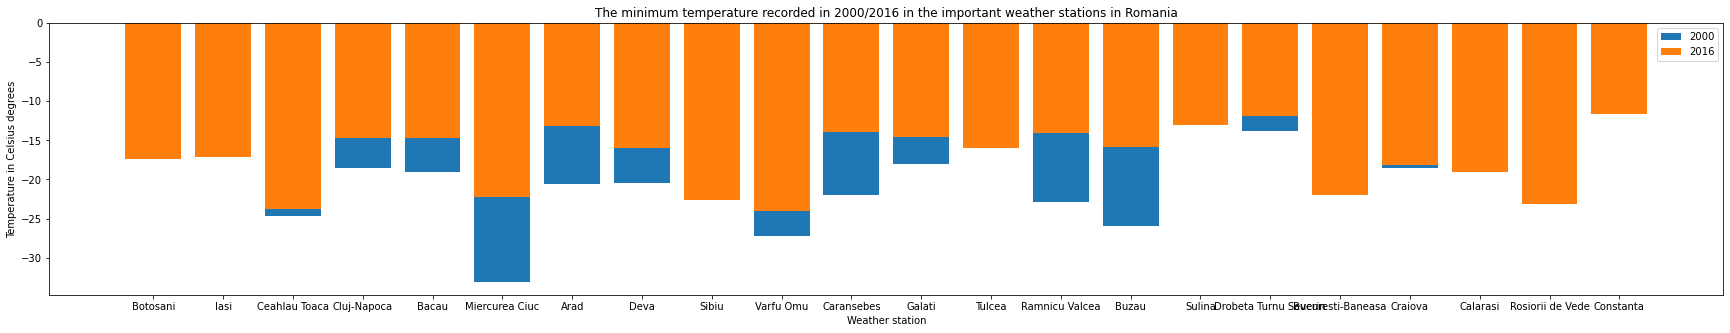

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.bar(weather_stations_2000_tmin.Nume,weather_stations_2000_tmin.TMIN,label='2000')
plt.bar(weather_stations_2016_tmin.Nume,weather_stations_2016_tmin.TMIN,label='2016')
plt.legend()
plt.xlabel('Weather station')
plt.ylabel('Temperature in Celsius degrees')
plt.title('The minimum temperature recorded in 2000/2016 in the important weather stations in Romania')

✏️It can be seen that the minimum temperatures recorded in 2000 were lower than those recorded in 2016 in more than half of the weather stations.

**What was the maximum temperature in 2000 and in 2016, recorded in each meteorological station?**🕵🏼

In [243]:
weather_stations_2000_tmax = weather_stations_2000.join(climate_data_2000.groupby('CODST').max().TMAX)
weather_stations_2016_tmax = weather_stations_2016.join(climate_data_2016.groupby('CODST').max().TMAX)

Text(0.5, 1.0, 'The maximum temperature recorded in 2000/2016 in the important weather stations in Romania')

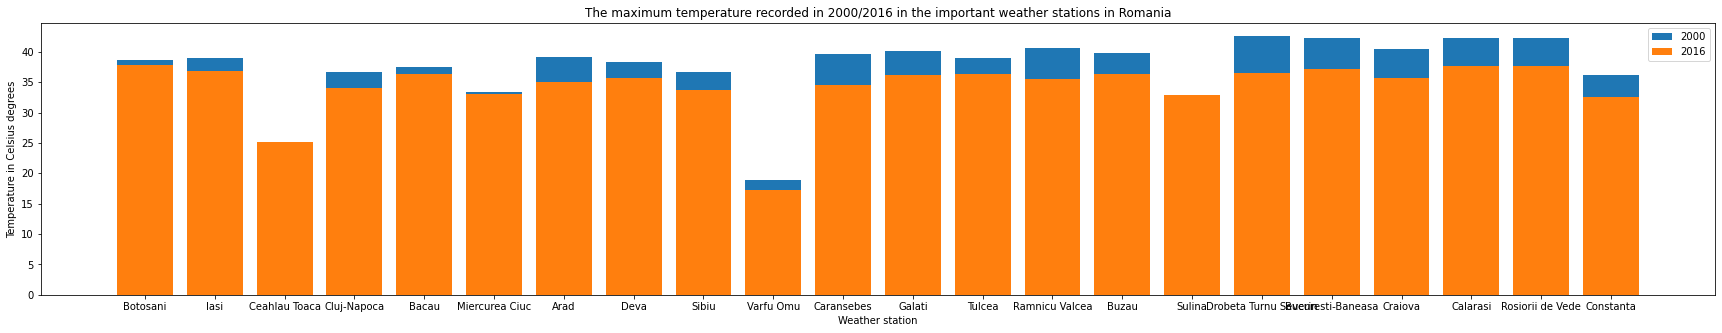

In [244]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.bar(weather_stations_2000_tmax.Nume,weather_stations_2000_tmax.TMAX,label='2000')
plt.bar(weather_stations_2016_tmax.Nume,weather_stations_2016_tmax.TMAX,label='2016')
plt.legend()
plt.xlabel('Weather station')
plt.ylabel('Temperature in Celsius degrees')
plt.title('The maximum temperature recorded in 2000/2016 in the important weather stations in Romania')

✏️It can be seen that the maximum temperatures recorded in 2000 were higher than those recorded in 2016 in most weather stations. 

**We will compare the evolution of the daily maximum in the meteorological station, from Drobeta Turnu Severin in the years 2000 and 2016.**🕵🏼

In [245]:
drobeta2000_merge = climate_data_2000.merge(weather_stations_2000, on='CODST')
climate_2000 = drobeta2000_merge[drobeta2000_merge.Nume == 'Drobeta Turnu Severin']
drobeta2016_merge = climate_data_2016.merge(weather_stations_2016, on='CODST')
climate_2016 = drobeta2016_merge[drobeta2016_merge.Nume == 'Drobeta Turnu Severin']

Text(0.5, 0.98, 'Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')

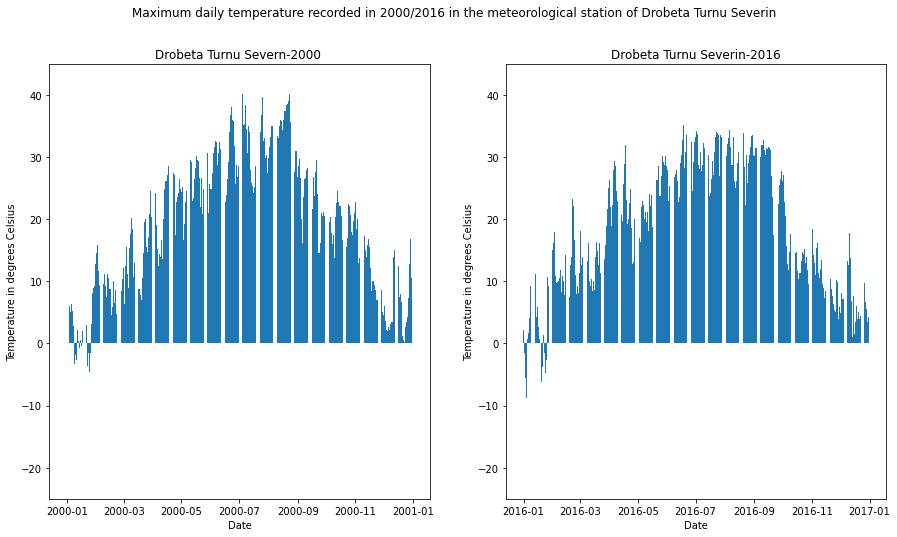

In [246]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.bar(climate_2000.DATCLIM, climate_2000.TMAX)
ax2.bar(climate_2016.DATCLIM, climate_2016.TMAX)
fig.align_labels()

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature in degrees Celsius')
ax1.set_title('Drobeta Turnu Severn-2000 ')
ax1.set_ylim(-25, 45)

ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature in degrees Celsius')
ax2.set_title('Drobeta Turnu Severin-2016')
ax2.set_ylim(-25, 45)

fig.suptitle('Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')

✏️It can be seen that the year 2000 was warmer than the year 2016. There is also a significant difference in the extreme values for the two years studied.

✏️To study how varied are the temperatures observed by the weather station Drobeta Turnu Severin in the two years, we ask ourselves how many times a certain value was recorded. What we are trying to find out here is whether the values ​​recorded most often are relatively few, or there are many thermal values ​​observed equally often.

Text(0.5, 0.98, 'Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')

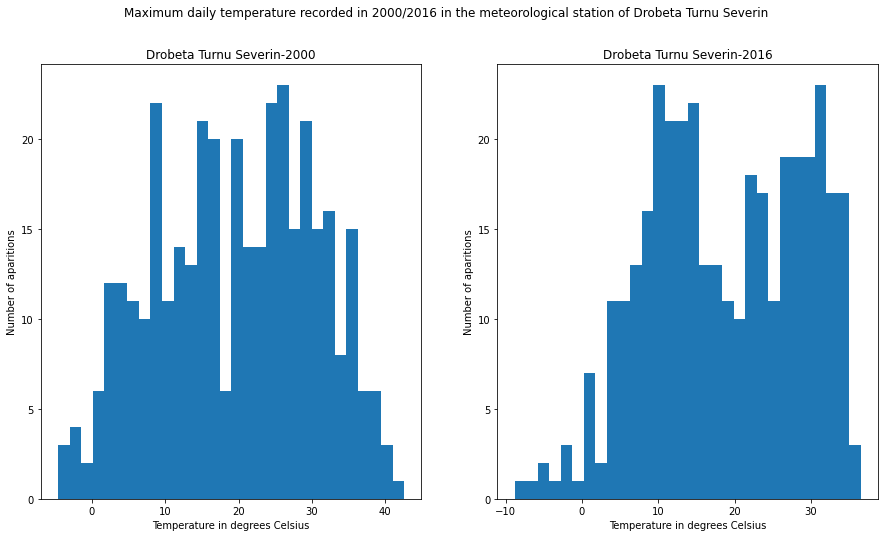

In [247]:
drobeta2000_merge = climate_data_2000.merge(weather_stations_2000, on='CODST')
climate_2000 = drobeta2000_merge[drobeta2000_merge.Nume == 'Drobeta Turnu Severin']
drobeta2016_merge = climate_data_2016.merge(weather_stations_2016, on='CODST')
climate_2016 = drobeta2016_merge[drobeta2016_merge.Nume == 'Drobeta Turnu Severin']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.hist(climate_2000.TMAX, bins=30)
ax2.hist(climate_2016.TMAX, bins=30)
fig.align_labels()
ax1.set_ylabel('Number of aparitions')
ax1.set_xlabel('Temperature in degrees Celsius')
ax1.set_title('Drobeta Turnu Severin-2000')
ax2.set_ylabel('Number of aparitions')
ax2.set_xlabel('Temperature in degrees Celsius')
ax2.set_title('Drobeta Turnu Severin-2016')

fig.suptitle('Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')

In [248]:
print('The maximum daily temperature recorded in Drobeta Turnu Severin in 2000 varies between %.1f and %.1f degrees Celsius, with an average of %.1f degrees Celsius.' % (climate_2000.TMAX.min(), climate_2000.TMAX.max(), climate_2000.TMAX.mean()))

The maximum daily temperature recorded in Drobeta Turnu Severin in 2000 varies between -4.6 and 42.6 degrees Celsius, with an average of 19.6 degrees Celsius.


In [249]:
print('The maximum daily temperature recorded in Drobeta Turnu Severin in 2016 varies between %.1f and %.1f degrees Celsius, with an average of %.1f degrees Celsius.' % (climate_2016.TMAX.min(), climate_2016.TMAX.max(), climate_2016.TMAX.mean()))

The maximum daily temperature recorded in Drobeta Turnu Severin in 2016 varies between -8.8 and 36.5 degrees Celsius, with an average of 18.8 degrees Celsius.


**How are the thermal values distributed?**🕵🏼

In [250]:
print('Temperature variation at the Drobeta Turnu Severin station in 2000: %.2f' % (climate_2000.TMAX.var()))

Temperature variation at the Drobeta Turnu Severin station in 2000: 115.60


In [251]:
print('Temperature variation at the Drobeta Turnu Severin station in 2016: %.2f' % (climate_2016.TMAX.var()))

Temperature variation at the Drobeta Turnu Severin station in 2016: 102.01


✏️It can be observed that the temperatures measured by the Drobeta Turnu Severin station have a greater variation in the year 2000 compared to the year 2016. A clearer picture of the values ​​obtained for the variation, will give us the standard deviation, thus being able to relate to the temperature measurement unit in our case.

In [252]:
print('The standard deviation of temperatures at the Drobeta Turnu Severin station in 2000.: %.2f' % (climate_2000.TMAX.std()))


The standard deviation of temperatures at the Drobeta Turnu Severin station in 2000.: 10.75


In [253]:
print('The standard deviation of temperatures at the Drobeta Turnu Severin station in 2016.: %.2f' % (climate_2016.TMAX.std()))


The standard deviation of temperatures at the Drobeta Turnu Severin station in 2016.: 10.10


✏️Standard deviation indicates that about 34% of the annual temperatures are between μ and μ+σ and another 34% of the data between μ−σ and μ, where μ is the average temperature value and σ is standard deviation.

✏️In our case, it means that in more than 3 thirds of the year 2000, the temperatures in Drobeta Turnu Severin will be between 8.85 and 30.35 degrees. On the other hand, in over 3 thirds of 2016, temperatures in Drobeta Turnu Severin will be between 8.7 and 28.9 degrees.

**Normal distribution**🕵🏼

The most important distribution is the Gaussian or normal distribution. It is called *normal* because most of the data follows this type of distribution. When we calculated the standard deviation and the mean, and described the distribution of temperatures using these two values, we assumed that they follow a normal distribution and described the normal distribution defined by these values. The shape of the distribution is controlled only by these two values, called the parameters.

*How do we calculate the value of the distribution at a point?*

$$N(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$
The value of $N(x)$ represents the probability of observing the value $x$. $N(x)$ is a probability density function (i.e. function that describes the probability of observing a certain value). The $\frac{1}{\sigma\sqrt{2\pi}}$ factor is a normalization factor that guarantees the property of positivity and integrability of the function $N(x)$.

We can check how well such a distribution models our data.

Text(0.5, 0.98, 'Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')

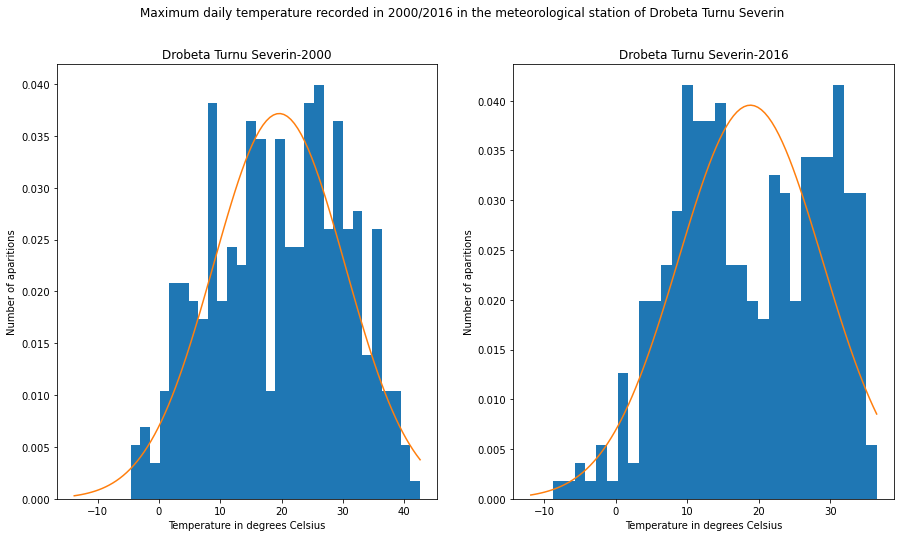

In [254]:
import numpy as np
def gaussian(x, mean, std):
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp(-1/2 * ((x-mean)/std)**2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.hist(climate_2000.TMAX, bins=30, density=True)
ax2.hist(climate_2016.TMAX, bins=30, density=True)

l_min_2000 =np.array(climate_2000["TMIN"].tolist())
l_max_2000 = np.array(climate_2000["TMAX"].tolist())
x_2000 = np.linspace(l_min_2000.min(), l_max_2000.max(), 100)

l_min_2016 = np.array(climate_2016["TMIN"].tolist())
l_max_2016 = np.array(climate_2016["TMAX"].tolist())
x_2016 = np.linspace(l_min_2016.min(), l_max_2016.max(), 100)

y_2000 = gaussian(x_2000, l_max_2000.mean(), l_max_2000.std())
y_2016 = gaussian(x_2016, l_max_2016.mean(), l_max_2016.std())

ax1.plot(x_2000, y_2000)
ax2.plot(x_2016, y_2016)

fig.align_labels()

ax1.set_ylabel('Number of aparitions')
ax1.set_xlabel('Temperature in degrees Celsius')
ax1.set_title('Drobeta Turnu Severin-2000')
ax2.set_ylabel('Number of aparitions')
ax2.set_xlabel('Temperature in degrees Celsius')
ax2.set_title('Drobeta Turnu Severin-2016')

fig.suptitle('Maximum daily temperature recorded in 2000/2016 in the meteorological station of Drobeta Turnu Severin')


✏️We notice that the normal distribution models our data perfectly.

In [255]:
print("The probability of recording a maximum temperature of 20 degrees Celsius in the year 2000:",gaussian(20, l_max_2000.mean(), l_max_2000.std()))
print("The probability of recording a maximum temperature of 20 degrees Celsius in the year 2016:",gaussian(20, l_max_2016.mean(), l_max_2016.std()))

The probability of recording a maximum temperature of 20 degrees Celsius in the year 2000: 0.03713320921816312
The probability of recording a maximum temperature of 20 degrees Celsius in the year 2016: 0.03928614364096952


✏️A description of our data is also given by the describe() function.

In [256]:
print("Drobeta Turnu Severin-2000:")
climate_2000.TMAX.describe()

Drobeta Turnu Severin-2000:


count    366.000000
mean      19.627327
std       10.751771
min       -4.600000
25%       11.000000
50%       20.250000
75%       28.275000
max       42.599998
Name: TMAX, dtype: float64

In [257]:
print("Drobeta Turnu Severin-2016:")
climate_2016.TMAX.describe()

Drobeta Turnu Severin-2016:


count    366.000000
mean      18.826769
std       10.100126
min       -8.800000
25%       10.825000
50%       18.450000
75%       28.050000
max       36.500000
Name: TMAX, dtype: float64

✏️In addition, we can visualize the distribution of our data in a box (and whiskers) plot.

Text(0.5, 1.0, 'Drobeta Turnu Severin')

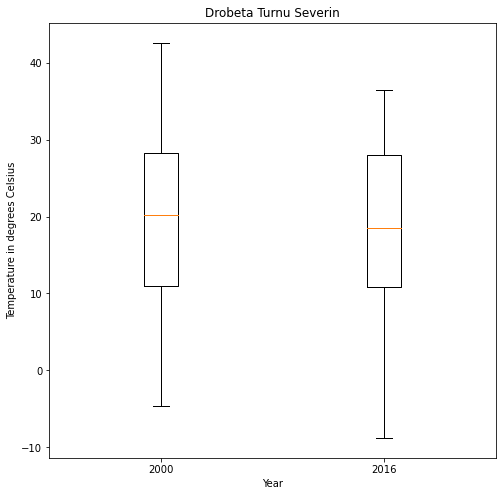

In [258]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.boxplot([climate_2000.TMAX, climate_2016.TMAX])
ax.set_ylabel('Temperature in degrees Celsius')
ax.set_xlabel('Year')
ax.set_xticklabels(['2000', '2016'])
ax.set_title('Drobeta Turnu Severin')
